# GRU for Stock

In [7]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras import utils

import matplotlib.pyplot as plt

### MinMax Scaling

In [8]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

### Parameters Setting

In [9]:
timesteps = seq_length = 7
data_dim = 5

### Colab에서 구글 drive을 마운트 하여 데이터 읽어오기

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Preprocessing

In [11]:
# Open,High,Low,Close,Volume
xy = np.loadtxt('/content/drive/My Drive/DL-2021-IDEC/data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

# very important. It does not work without it.
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]  # Close as label

### Step 1. Data

In [12]:
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    dataX.append(_x)
    dataY.append(_y)

# split to train and testing
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

### Step 2. GRU Model

In [13]:
model = Sequential()
model.add(GRU(1, input_shape=(seq_length, data_dim), 
               return_sequences=False))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1)                 24        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


### Step 3. Loss,Optimizer, Metric

In [14]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])

### Step 4. Train the model

In [15]:
history=model.fit(trainX, trainY, epochs=200, verbose=2)

Epoch 1/200
16/16 - 2s - loss: 0.0079 - mae: 0.0684
Epoch 2/200
16/16 - 0s - loss: 0.0065 - mae: 0.0646
Epoch 3/200
16/16 - 0s - loss: 0.0054 - mae: 0.0578
Epoch 4/200
16/16 - 0s - loss: 0.0045 - mae: 0.0518
Epoch 5/200
16/16 - 0s - loss: 0.0038 - mae: 0.0463
Epoch 6/200
16/16 - 0s - loss: 0.0033 - mae: 0.0422
Epoch 7/200
16/16 - 0s - loss: 0.0028 - mae: 0.0387
Epoch 8/200
16/16 - 0s - loss: 0.0025 - mae: 0.0358
Epoch 9/200
16/16 - 0s - loss: 0.0023 - mae: 0.0339
Epoch 10/200
16/16 - 0s - loss: 0.0021 - mae: 0.0324
Epoch 11/200
16/16 - 0s - loss: 0.0020 - mae: 0.0313
Epoch 12/200
16/16 - 0s - loss: 0.0019 - mae: 0.0307
Epoch 13/200
16/16 - 0s - loss: 0.0018 - mae: 0.0302
Epoch 14/200
16/16 - 0s - loss: 0.0018 - mae: 0.0301
Epoch 15/200
16/16 - 0s - loss: 0.0017 - mae: 0.0296
Epoch 16/200
16/16 - 0s - loss: 0.0017 - mae: 0.0294
Epoch 17/200
16/16 - 0s - loss: 0.0017 - mae: 0.0294
Epoch 18/200
16/16 - 0s - loss: 0.0017 - mae: 0.0291
Epoch 19/200
16/16 - 0s - loss: 0.0017 - mae: 0.0290
Ep

### Step 5. Test the Model

In [16]:
# make predictions
testPredict = model.predict(testX)

### Plot the Training Loss

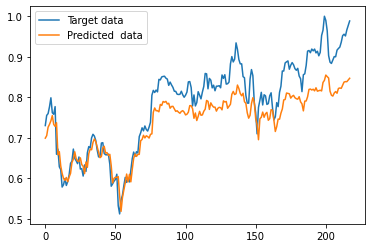

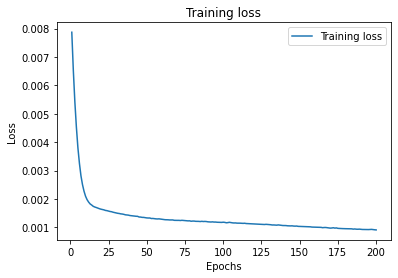

In [17]:
# print(testPredict)
plt.plot(testY, label='Target data')
plt.plot(testPredict, label='Predicted  data')
plt.legend()
plt.show()

history_dict = history.history
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()